### Hopfield Network is All You Need
#### Ramsauer *et. al* arXiv:2008.02217v3


Given $N$ patterns $x_i \in \mathcal{R}^d$, we can represent this data a single matrix, 
$$X = (x_1,...,x_N) \ \ \ X\in\mathcal{R}^{d\times N}$$
Define $M$ to be largest pattern,
$$M = \max_{i=1,...,N}||x_i||$$

The state query pattern is defined as $\xi \in \mathcal{R}^d$

Define 
$$lse(\beta, x) = \beta^{-1}\log \left(\sum_{i=1}^Ne^{\beta x_i} \right)$$

Energy function:

$$E = -lse(\beta,X^T\xi) + \frac{1}{2}\xi^T\xi+\beta^{-1}\log N + \frac{1}{2}M^2$$

Update rule: 
$$\xi^{t+1} = X\cdot \sigma_M(\beta X^T\xi)$$
where $\sigma_M(\circ)$ is the softmax function. 
Note: Energy function isn't super intuitive but update rule is. Compute similarity between current state and data, project into $[0,1]^d$ with softmax, then weight your knowledge by the softmax predictions.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import struct

In [5]:
def lse(beta, x):
    """
    parameters:
    beta - scalar (1,)
        scaling value
    x - scalar (d,)
        typically inner product of data matrix with state variable
    returns:
    scalar (1,)
        loss value
    """
    return (1/beta)*np.log(np.sum(np.exp(beta*x)))


def totalE(X,xi,beta):
    """
    parameters:
    X - scalar (d,N)
        data matrix
    xi - scalar (d,)
        current state value
    beta - scalar (1,)
        scaling value
    returns:
    scalar (1,)
        total loss value
    """
    _,N = X.shape
    M = np.max(np.linalg.norm(X,))
    
    E1 = (1/2)*xi.T@xi + (1/beta)*np.log()
    E2 = -lse(beta, X.T@xi)
    

def softmax(x):
    """
    softmax: R^d |-> [0,1]^d
    parameters:
    x - scalar (d,)
        typically inner product of data matrix with state variable
    returns:
    [0,1]^d
    """
    return np.divide(np.exp(x), np.sum(np.exp(x)))

### Load data

In [97]:
def load_data(imgfname,lblfname):
    with open(imgfname,'rb') as f:
        magic, size = struct.unpack('>II',f.read(8))
        nrows, ncols = struct.unpack('>II',f.read(8))
        fimg = np.fromfile(f, dtype=np.dtype(np.uint8)).newbyteorder(">")
        img = (1/256.)*fimg.reshape(size,nrows*ncols).T
    with open(lblfname, 'rb') as i:
        magic, size = struct.unpack('>II', i.read(8))
        lbl = np.fromfile(i, dtype=np.dtype(np.uint8)).newbyteorder(">") 
    return img, lbl, (nrows,ncols)    

(784, 9)

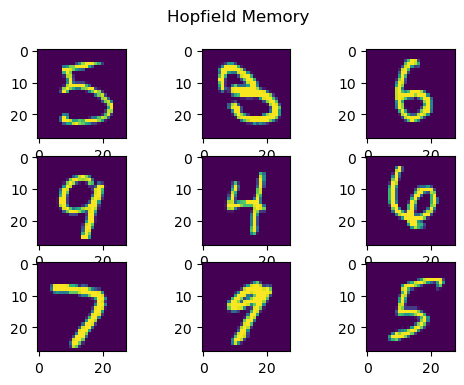

In [98]:
img,lbl,s = load_data('data/t10k-images-idx3-ubyte','data/t10k-labels-idx1-ubyte')

fig,axs = plt.subplots(3,3,dpi=100) # figsize=(8, 4)
fig.suptitle('Hopfield Memory')
start_idx = 15
for i in range(9):
    axs[i%3,i//3].imshow(img[:,start_idx+i].reshape(s[0],s[1]))
    
X = img[:,start_idx:(start_idx+9)]
X.shape

### Preturb memory with noise



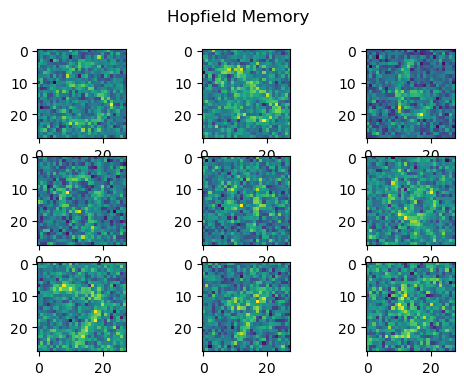

In [148]:
Xn = X + 0.6*np.random.randn(X.shape[0], X.shape[1])

fig,axs = plt.subplots(3,3,dpi=100) # figsize=(8, 4)
fig.suptitle('Hopfield Memory')
start_idx = 15
for i in range(9):
    axs[i%3,i//3].imshow(Xn[:,i].reshape(s[0],s[1]))

In [149]:
def simulate_hfn(X,xi0,beta,nitr):
    xis = np.zeros((xi.size,nitr+1))
    xis[:,0] = Xn[:,0]
    for i in range(nitr):
        xis[:,i+1] = X@softmax(beta*X.T@xis[:,i])
    return xis

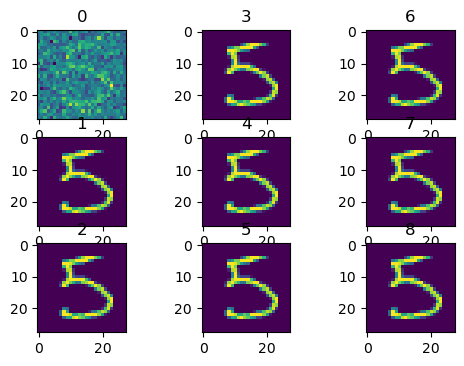

In [150]:
beta = 1
nitr = 9

xis1 = simulate_hfn(X,Xn[:,0],beta,nitr)
fig,axs = plt.subplots(3,3,dpi=100) # figsize=(8, 4)
for i in range(9):
    axs[i%3,i//3].imshow(xis1[:,i].reshape(s[0],s[1]))
    axs[i%3,i//3].set_title('%d'%(i))

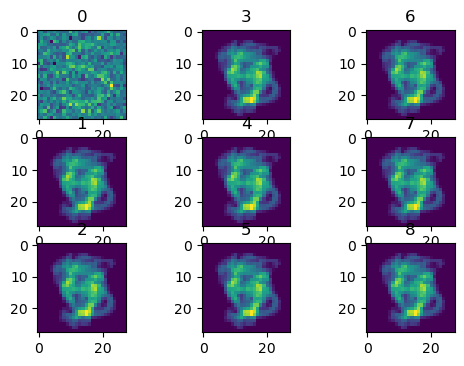

In [151]:
beta = 0.0001
nitr = 9

xis1 = simulate_hfn(X,Xn[:,0],beta,nitr)
fig,axs = plt.subplots(3,3,dpi=100) # figsize=(8, 4)
for i in range(9):
    axs[i%3,i//3].imshow(xis1[:,i].reshape(s[0],s[1]))
    axs[i%3,i//3].set_title('%d'%(i))

8.199227124519306

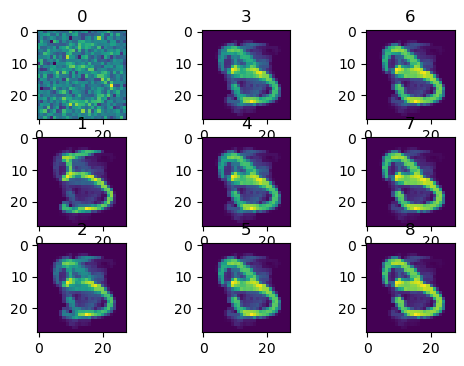

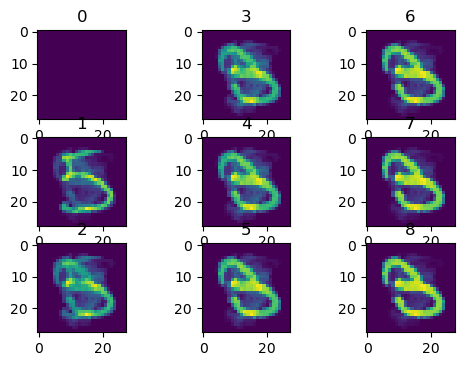

In [152]:
beta = 0.05
nitr = 9

xisin = np.zeros((xi.size,nitr+1))
xisout = np.zeros((xi.size,nitr+1))
xisin[:,0] = Xn[:,0]
for i in range(1,nitr):
    xisout[:,i] = X@softmax(beta*X.T@xisin[:,i-1])
    xisin[:,i] = xisout[:,i]+0.1*X[:,0]
    

fig,axs = plt.subplots(3,3,dpi=100) # figsize=(8, 4)
for i in range(9):
    axs[i%3,i//3].imshow(xisin[:,i].reshape(s[0],s[1]))
    axs[i%3,i//3].set_title('%d'%(i))
    
    
fig,axs = plt.subplots(3,3,dpi=100) # figsize=(8, 4)
for i in range(9):
    axs[i%3,i//3].imshow(xisout[:,i].reshape(s[0],s[1]))
    axs[i%3,i//3].set_title('%d'%(i))
    
np.linalg.norm(xis[:,-1]-xis[:,-2])